In [1]:
# 5.2 합성곱 신경망 맛보기

# 테스트를 위한 데이터
# fashion_mnist데이터셋 , 운동화,셔츠,샌들 같은 작은 이미지로 구성된 데이터
# 기본 MNIST 데이터셋처럼 열 가지 분류될 수 있는 28x28 픽셀의 이미지 7만 개로 구성되어 있음.
# 데이터셋은 훈련 데이터는 0~255 사이의 값을 가지는 28x28 크기의 넘파일 배열
# 레이블(정답) 데이터는 0~9까지 정수 값을 갖는 배열
# 0: T-shirt, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker
# 8: Bag , 9: Ankel boot

# 라이브러리 호출
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
# 훈련 및 레이블 데이터 만들기
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

In [16]:
X_test[0].size

784

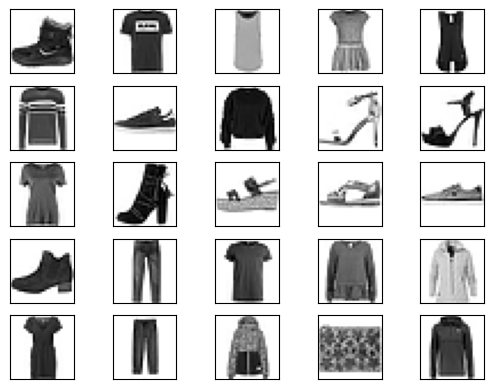

In [65]:
# 분류에 사용할 클래스 정의
# T-shirt ~ Ankle boot
class_name = ['T-shirt','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
              'Shirt','Sneaker','Bag' , 'Ankel boot']
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [66]:
# 합성곱 신경망과 심층신경망을 비교...
# 심층신경망을 이용하여 네트워크를 구성

# 데이터 전처리 작업
X_train, X_test = X_train / 255.0, X_test / 255.0 # 이미지 데이터 255로 나눔. 0~255

# 모델 생성 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),     # 입력 데이터 크기
    tf.keras.layers.Dense(128, activation='relu'),   # 은닉층 :128개 노드(뉴런), activation='relu'
    tf.keras.layers.Dropout(0.2),                    # 과적합 문제를 방지하기 위해 특정 노드를 0으로 ..20% 노드를 무작위로 0으로 변경
    tf.keras.layers.Dense(10, activation='softmax') # 출력층 노드는 10개, 활성화 함수 softmax
])

d:\tensorflow\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
# 모델 컴파일
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)           # 훈련 데이터셋을 이용한 모델 훈련
model.evaluate(X_test, y_test, verbose=2)       # 검증 데이터셋을 이용하여 모델 평가

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7587 - loss: 0.6924
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8501 - loss: 0.4156
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8611 - loss: 0.3794
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8743 - loss: 0.3478
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8776 - loss: 0.3317
313/313 - 0s - 1ms/step - accuracy: 0.8710 - loss: 0.3614


[0.3613826036453247, 0.8709999918937683]

In [39]:
# 패키지 설치
!pip install scikit_image

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ---------------------------------------- 12.9/12.9 MB 81.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 45.7 MB/s eta 0:00:00


In [40]:
# 이미지 데이터를 255로 나눈 이유...

import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [60]:
def print_image_summary(image, labels):
    print('--------------')
    print('Image Datails:')
    print('--------------')
    print(f'Image dimentions :' '{image.shape}')
    print('Channels:')
    if len(labels) == 1:
        image = image[..., np.newaxis]
    
    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}') 


C:\Users\Admin\AppData\Local\Temp\ipykernel_7272\702883669.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(image_gs, ax=ax)


(np.float64(-0.5), np.float64(453.5), np.float64(702.5), np.float64(-0.5))

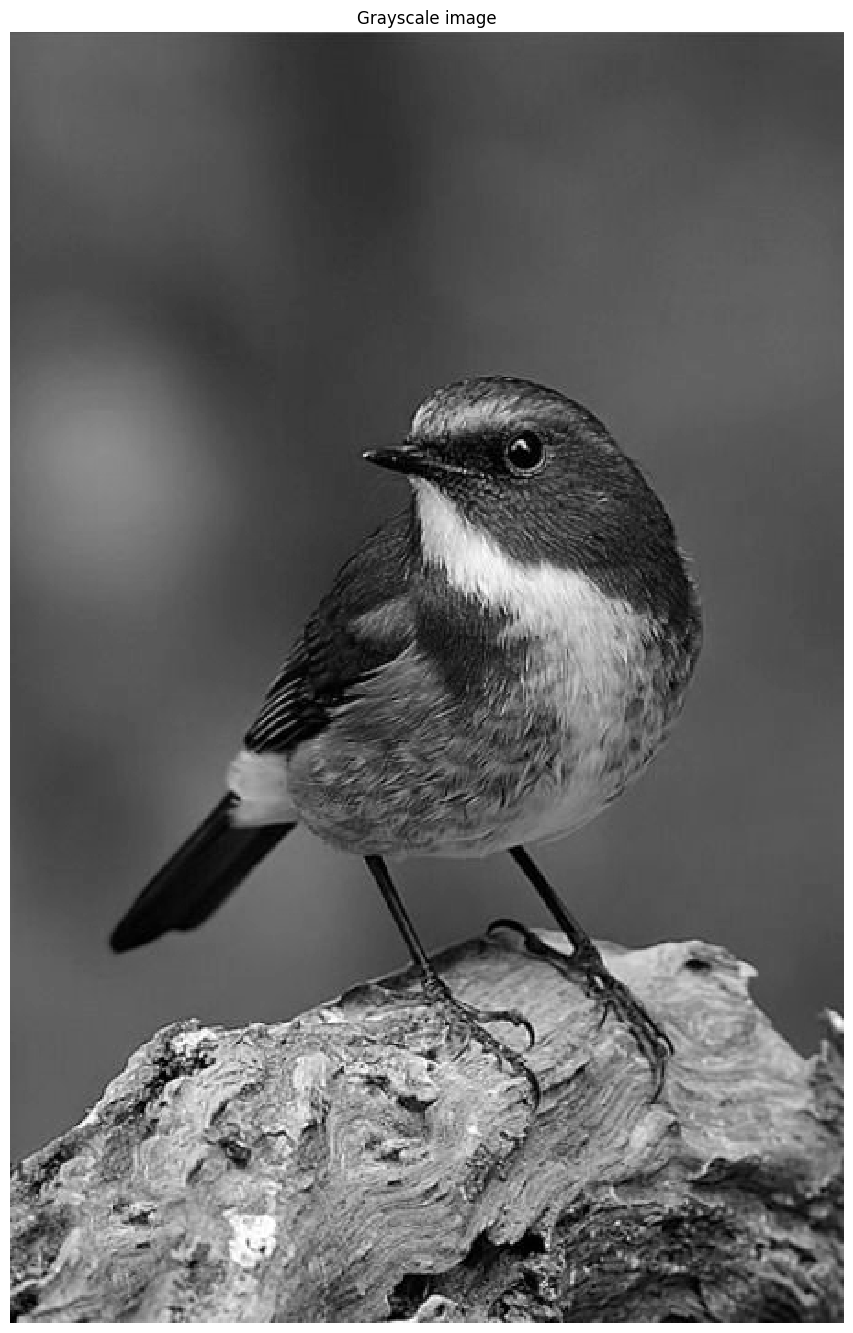

In [62]:
image_gs = imread('./data/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off')

In [63]:
print_image_summary(image_gs, ['G'])

--------------
Image Datails:
--------------
Image dimentions :{image.shape}
Channels:
G : min=0.0000, max=1.0000


In [74]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
# 훈련 및 레이블 데이터 만들기
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

In [75]:
# 합성곱을 이용한 방식
X_train_final = X_train.reshape((-1,28,28,1))/255.
X_test_final = X_test.reshape((-1,28,28,1))/255.

In [76]:
# 합성곱 네트워크를 이용한 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(), # 1차원으로 변경
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

d:\tensorflow\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
# 합성곱 네트워크 모델 컴파일
model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [78]:
# 합성곱 네트워크 모델 학습 및 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7998 - loss: 0.5539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9027 - loss: 0.2655
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9222 - loss: 0.2146
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9321 - loss: 0.1853
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9412 - loss: 0.1552
313/313 - 1s - 2ms/step - accuracy: 0.9201 - loss: 0.2315


[0.23147666454315186, 0.9200999736785889]

In [80]:
## 5.3 전이 학습
# ImageNet 데이터에 대해 가중치가 선행 학습된 ResNet50 모델을 사용
# 라이브러리 호출
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 사전 훈련된 모델 불러오기
model = ResNet50(include_top=True,     # 네트워크 상단에 완전연결층 포함 여부
                 weights="imagenet",   # 가중치를 의미, imagenet은 사전 훈련값, None은 무작위 초기화
                 input_tensor=None,    # 입력 데이터의 텐서(layers.Input()의 출력)
                 input_shape=None,      # 입력 이미지에 대한 텐서 크기
                 pooling=None,          # 풀링에서 사용할 수 있는 값은 'None,'avg','max'로 추가여부
                 classes=1000           # weights로 "imagenet"을 사용하려면 , classes 값이 1000이어야 함
                 ) 

In [85]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [83]:
model_with_conv.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,264,928 (4.83 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 843,286 (3.22 MB)

In [86]:
# 앞서 만든 model(ResNet50으로 사전학습된)
# 밀집층을 추가
model.trainable = False   # 고정 - 학습시 훈련값에 영향을 받지 않기 위해
model = Sequential([model, 
                    Dense(2, activation='sigmoid')])  
                    #------ 시그모이드 함수가 포함된 밀집층 추가
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1000)           │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,638,714 (97.80 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [87]:
# 모델 컴파일 - 모델을 효과적으로 구현할 수 있는 환경 설정을 진행...
model.compile(
    optimizer='adam',
    loss = 'binary_crossentropy',
    metrics=['accuracy'])

In [ ]:
# catanddot 캐글에서 제공하는 개와 고양이 이미지
# 나중에...ImageDataGenerator 클래스의 사용...